In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from citipy import citipy
import openweathermapy.core as owm
import random
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
#import API key
from config import wkey

In [2]:
# assigning variable to the citipy cities dictionary
city = citipy.WORLD_CITIES_DICT
#creating a city list to loop through citipy
cities=[]

#looping through citipy to get list of 500 random lat and longitude
for i in range(500):
   a = list(city)
   b = random.choice(a)
   cities.append(b)

#placing random list of 500 cities from citipy into a dataframe
import_df= pd.DataFrame(cities)

# New data frame with formated columns to hold randomly lat & lng & weather info
cities_df = pd.DataFrame()
cities_df["Latitude"] = import_df[0]
cities_df["Longitude"] = import_df[1]
cities_df["City Name"] = ""
cities_df["Country Code"] = ""
cities_df["Temperature"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Humidity"] = ""

#cities_df.head()

In [3]:
#looping through the latitude and longitude values from citypy to get the city name and country code
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"City Name",city.city_name)
    cities_df.set_value(index,"Country Code",city.country_code)
    
#cities_df.head()

C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [4]:
# Create settings dictionary with information we're interested in

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
settings = {"units": "metric", "appid": wkey}
for index,row in cities_df.iterrows():
    city = row["City Name"]
    country = row ["Country Code"]
    city_country = str(city)+ "," + str(country)
    
    #using try and except method incase API has missing data for random sample of cities
    try:
        #creating variable for API call       
        current_weather_url = url + "&appid=" + wkey + "&q=" + city_country
        current_weather = requests.get(current_weather_url).json()
        #appending data pulled in the loop to the cities dataframe
        cities_df.set_value(index, "Temperature", current_weather.get("main",{}).get("temp"))
        cities_df.set_value(index, "Humidity", current_weather.get("main",{}).get("humidity"))
        cities_df.set_value(index, "Cloudiness", current_weather.get("clouds",{}).get("all"))
        cities_df.set_value(index, "Wind Speed", current_weather.get("wind",{}).get("speed"))
        print(f"Running Current Weather Information for {city}")
        print(current_weather_url)
    except:
        cities_df.set_value(index, "Temperature", current_weather.get("main",{}).get("temp"))
        cities_df.set_value(index, "Humidity", current_weather.get("main",{}).get("humidity"))
        cities_df.set_value(index, "Cloudiness", current_weather.get("clouds",{}).get("all"))
        cities_df.set_value(index, "Wind Speed", current_weather.get("wind",{}).get("speed"))
        print(f"No Data found for {city}")
        print(current_weather_url)  
              


C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Running Current Weather Information for tiszalok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tiszalok,hu
Running Current Weather Information for ciumani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ciumani,ro
Running Current Weather Information for wankaner
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=wankaner,in
Running Current Weather Information for bolong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bolong,ph
Running Current Weather Information for panagjuriste
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=panagjuriste,bg
Running Current Weather Information for lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lorengau,pg
Running Curren

Running Current Weather Information for sheffield
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sheffield,us
Running Current Weather Information for artena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=artena,it
Running Current Weather Information for ronda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ronda,es
Running Current Weather Information for allen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=allen,us
Running Current Weather Information for san lorenzo de el escorial
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san lorenzo de el escorial,es
Running Current Weather Information for axos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=axos,gr
Ru

Running Current Weather Information for seto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=seto,jp
Running Current Weather Information for edgemoor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=edgemoor,us
Running Current Weather Information for voi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=voi,ke
Running Current Weather Information for kamphaeng phet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kamphaeng phet,th
Running Current Weather Information for shurob
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=shurob,tj
Running Current Weather Information for wuppertal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=wuppertal,de
Running Current Weather 

Running Current Weather Information for tizapan el alto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tizapan el alto,mx
Running Current Weather Information for orica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=orica,hn
Running Current Weather Information for muriwai beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=muriwai beach,nz
Running Current Weather Information for bloomington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bloomington,us
Running Current Weather Information for melekhovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=melekhovo,ru
Running Current Weather Information for dunnville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=d

Running Current Weather Information for bangalore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bangalore,in
Running Current Weather Information for kilcullen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kilcullen,ie
Running Current Weather Information for yurgamysh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yurgamysh,ru
Running Current Weather Information for monte azul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=monte azul,br
Running Current Weather Information for lewistown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lewistown,us
Running Current Weather Information for sidhauli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sidhauli,in
Runn

Running Current Weather Information for kruglolesskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kruglolesskoye,ru
Running Current Weather Information for bairnsdale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bairnsdale,au
Running Current Weather Information for cimahi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cimahi,id
Running Current Weather Information for san miguel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san miguel,ph
Running Current Weather Information for simpang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=simpang,id
Running Current Weather Information for peru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=peru,us
Running Cu

Running Current Weather Information for septemvri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=septemvri,bg
Running Current Weather Information for bajitpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bajitpur,bd
Running Current Weather Information for diwek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=diwek,id
Running Current Weather Information for moravsky beroun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=moravsky beroun,cz
Running Current Weather Information for chiniot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chiniot,pk
Running Current Weather Information for thyolo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=thyolo,mw
Running Curr

Running Current Weather Information for koygorodok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=koygorodok,ru
Running Current Weather Information for gandhidham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gandhidham,in
Running Current Weather Information for skarnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=skarnes,no
Running Current Weather Information for laubach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=laubach,de
Running Current Weather Information for hammelburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hammelburg,de
Running Current Weather Information for guatape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=guatape,co
Running Cu

Running Current Weather Information for tarso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tarso,co
Running Current Weather Information for bradeni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bradeni,ro
Running Current Weather Information for darmanesti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=darmanesti,ro
Running Current Weather Information for brenham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=brenham,us
Running Current Weather Information for bahia honda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bahia honda,cu
Running Current Weather Information for tolon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tolon,gr
Running Current Weathe

Running Current Weather Information for ponyri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ponyri,ru
Running Current Weather Information for dumbea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dumbea,nc
Running Current Weather Information for hazorasp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hazorasp,uz
Running Current Weather Information for pojorata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pojorata,ro
Running Current Weather Information for purace
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=purace,co
Running Current Weather Information for waiblingen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=waiblingen,de
Running Current Weather 

In [5]:
cities_df.to_csv("cities_weather_data.csv", header = True)
#cities_df.head()

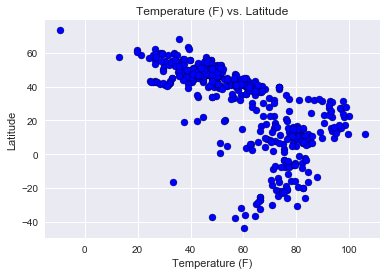

In [6]:
#Temperature (F) vs. Latitude

#using seaborn
sns.set()
#assigining variables to x and y axis
temp= cities_df["Temperature"]
lat= cities_df["Latitude"]

#creating and formating scatter plot
plt.scatter(temp, lat, marker="o", color="blue",edgecolors="black", )
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Temperature (F) vs. Latitude.png")

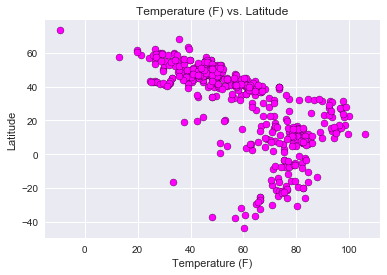

In [7]:
#Humidity (%) vs. Latitude

#using seaborn
sns.set()
#assigining variables to x and y axis
temp= cities_df["Temperature"]
lat= cities_df["Latitude"]

#creating and formating scatter plot
plt.scatter(temp, lat, marker="o", color="magenta",edgecolors="black", )
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Temperature (F) vs. Latitude.png")

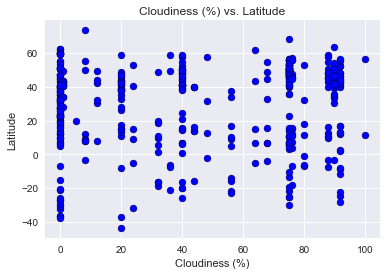

In [8]:
#Cloudiness (%) vs. Latitude
#using seaborn
sns.set()
#assigining variables to x and y axis
cloudiness= cities_df["Cloudiness"]
lat= cities_df["Latitude"]

#creating and formating scatter plot
plt.scatter(cloudiness, lat, marker="o", color="blue",edgecolors="black", )
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Cloudiness (%) vs. Latitude.png")

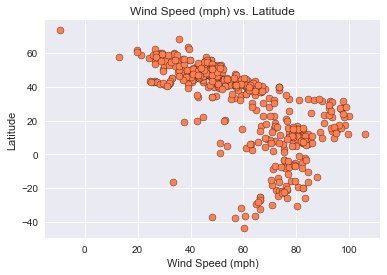

In [9]:
#Wind Speed (mph) vs. Latitude
#using seaborn
sns.set()
#assigining variables to x and y axis
wind= cities_df["Wind Speed"]
lat= cities_df["Latitude"]

#creating and formating scatter plot
plt.scatter(temp, lat, marker="o", color="coral",edgecolors="black", )
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Wind Speed (mph) vs. Latitude.png")